In [1]:
# Librerias que usa el notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Tratamiento de datos

Obtenemos los datos del dataset _heart.dat_, del cual modificaremos algunos valores para tener una comprensión mejor de sus elementos

In [18]:
headers = ['age','sex','chest_pain','blood_p','serum','blood_s',
           'electro','max_heart', 'angina','oldpeak','slope',
           'vessel','thal','normal']
df = pd.read_csv("heart.dat",  header=None, names=headers, sep=' ')
# Categorizacion
pd.options.mode.chained_assignment = None  # default='warn'
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['chest_pain'][df['chest_pain'] == 1] = 'typical angina'
df['chest_pain'][df['chest_pain'] == 2] = 'atypical angina'
df['chest_pain'][df['chest_pain'] == 3] = 'non-anginal pain'
df['chest_pain'][df['chest_pain'] == 4] = 'asymptomatic'
df['blood_s'][df['blood_s'] == 0] = 'lower than 120mg/ml'
df['blood_s'][df['blood_s'] == 1] = 'greater than 120mg/ml'
df['electro'][df['electro'] == 0] = 'normal'
df['electro'][df['electro'] == 1] = 'ST-T wave abnormality'
df['electro'][df['electro'] == 2] = 'left ventricular hypertrophy'
df['angina'][df['angina'] == 0] = 'no'
df['angina'][df['angina'] == 1] = 'yes'
df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'
df['thal'][df['thal'] == 3] = 'normal'
df['thal'][df['thal'] == 6] = 'fixed defect'
df['thal'][df['thal'] == 7] = 'reversable defect'

## Visualizacion de los datos

Primero veremos un par de entradas dentro del dataset para notar nuestras variables y de que tipo son

In [3]:
df.head()

,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
0,70.0,male,asymptomatic,130.0,322.0,lower than 120mg/ml,left ventricular hypertrophy,109.0,no,2.4,flat,3.0,normal,2
1,67.0,female,non-anginal pain,115.0,564.0,lower than 120mg/ml,left ventricular hypertrophy,160.0,no,1.6,flat,0.0,reversable defect,1
2,57.0,male,atypical angina,124.0,261.0,lower than 120mg/ml,normal,141.0,no,0.3,upsloping,0.0,reversable defect,2
3,64.0,male,asymptomatic,128.0,263.0,lower than 120mg/ml,normal,105.0,yes,0.2,flat,1.0,reversable defect,1
4,74.0,female,atypical angina,120.0,269.0,lower than 120mg/ml,left ventricular hypertrophy,121.0,yes,0.2,upsloping,1.0,normal,1


Además solicitamos la información del dataframe para saber de forma más exacta su contenido (del cual sabemos los tipos exactos de las variables, cuantas son y cuantas entradas totales tenemos)

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age           270 non-null float64
sex           270 non-null object
chest_pain    270 non-null object
blood_p       270 non-null float64
serum         270 non-null float64
blood_s       270 non-null object
electro       270 non-null object
max_heart     270 non-null float64
angina        270 non-null object
oldpeak       270 non-null float64
slope         270 non-null object
vessel        270 non-null float64
thal          270 non-null object
normal        270 non-null int64
dtypes: float64(6), int64(1), object(7)
memory usage: 29.6+ KB


En resumen, nuestro dataframe tiene 14 elementos, donde el último es la variable que deseamos predecir

Dentro de las **variable reales** tenemos:
- **age**: Edad del individuo
- **blood_p**: Presión sanguínea en descanso
- **serum**: Colesterol sérico
- **max_heart**: Ritmo ardíaco máximo obtenido
- **oldpeak**: Depresión inducida por ejercicio en un electrocardiograma
- **vessel**: Número de vasos mayores (0-3) coloreados en procedimiento
- **normal**: Absencia (1) o presencia (2) de enfermedad relativa al corazón [Variable a predecir]

Dentro de las **variables ordenadas**:
- **slope**: Pendiente en el ejercicio realizado en el electrocardiograma

Dentro de las **variables binarias**:
- **sex**: Sexo del individuo
- **blood_s**: Si el azúcar en la sangre es mayor a 120mg/dl
- **angina**: Si hay angina (dolor localizado) producida por ejercicio

Dentro de las **variables nominales**:
- **electro**: Resultado del electricardiograma (0,1,2)
- **chest_pain**: Tipo de dolor en el pecho (4 tipos)
- **thal**: Indicador de talasemia (enfermedades hemolíticas), 3 = normal, 6 = defecto fijo, 7 = defecto reversible

A continuación obtenemos información sobre la distribución de las variables numéricas

In [5]:
df.describe()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,0.670370,1.444444
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.943896,0.497827
min,29.000000,94.000000,126.000000,71.000000,0.00000,0.000000,1.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,0.000000,1.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,0.000000,1.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,3.000000,2.000000


Con esta tabla podemos ver los valores de las variables que tiene valores númericos y sus rangos, además de media y desviación estándar, a continuación evaluamos las variables con valores nominales

In [6]:
df.describe(include=['object'])

,sex,chest_pain,blood_s,electro,angina,slope,thal
count,270,270,270,270,270,270,270
unique,2,4,2,3,2,3,3
top,male,asymptomatic,lower than 120mg/ml,left ventricular hypertrophy,no,upsloping,normal
freq,183,129,230,137,181,130,152


Con esta tabla podemos ver los datos nominales representados, su frecuencia y cuantas categorías tiene cada variable

### Pacientes sanos y enfermos

Primero debemos obtener los conjuntos de pacientes enfermos y sanos, los cuales se identifican con la variable **normal**

In [7]:
sanos = df[df['normal'] == 1]
enf = df[df['normal'] == 2]

#### Presión sanguínea,  azúcar en la sangre y ritmo cardíaco entre pacientes sanos y enfermos

Con el gráfico de ayuda podemos notar que las personas enfermas tienden a tener la presión más elevada (desde 140 hacia arriba), en cuanto a la métrica de azúcar en la sangre no podemos concluir demasiado, y sobre el ritmo cardíaco podemos decir que, si este es elevado, es más probable que el paciente este sano

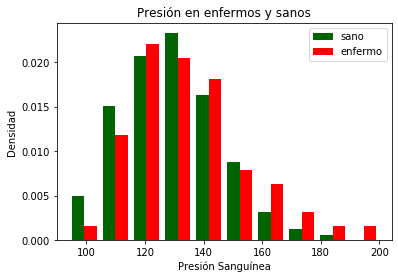

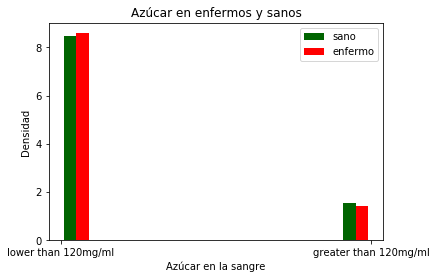

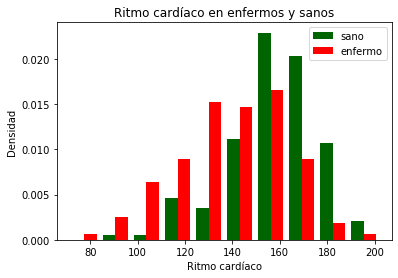

In [8]:
p_s = list(sanos['blood_p'])
p_e = list(enf['blood_p'])
a_s = list(sanos['blood_s'])
a_e = list(enf['blood_s'])
r_s = list(sanos['max_heart'])
r_e = list(enf['max_heart'])
col = ["darkgreen","red"]
lab = ["sano","enfermo"]
plt.hist([p_s,p_e],color=col,label=lab,density=True)
plt.xlabel("Presión Sanguínea")
plt.ylabel("Densidad")
plt.title("Presión en enfermos y sanos")
plt.legend()
plt.show()
plt.hist([a_s,a_e],color=col,label=lab,density=True)
plt.xlabel("Azúcar en la sangre")
plt.ylabel("Densidad")
plt.title("Azúcar en enfermos y sanos")
plt.legend()
plt.show()
plt.hist([r_s,r_e],color=col,label=lab,density=True)
plt.xlabel("Ritmo cardíaco")
plt.ylabel("Densidad")
plt.title("Ritmo cardíaco en enfermos y sanos")
plt.legend()
plt.show()

### Diferencias de enfermedad entre los sexos

Una métrica que puede ser importante, es el hecho del sexo del paciente, según nuestro gráfico la densidad de enfermos hombres es mucho mayor que las mujeres enfermas, en el caso de ser un paciente sano no podemos decir nada con certeza

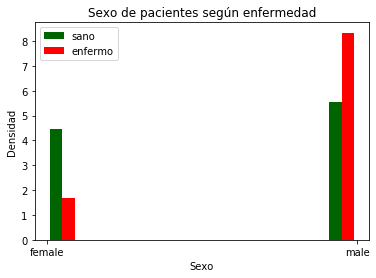

In [9]:
p_s = list(sanos['sex'])
p_e = list(enf['sex'])
col = ["darkgreen","red"]
lab = ["sano","enfermo"]
plt.hist([p_s,p_e],color=col,label=lab,density=True)
plt.xlabel("Sexo")
plt.ylabel("Densidad")
plt.title("Sexo de pacientes según enfermedad")
plt.legend()
plt.show()

### Diferencias de enfermedad dada condición de talasemia

Esta métrica sirve de contraste, ya que si la talasemia es normal

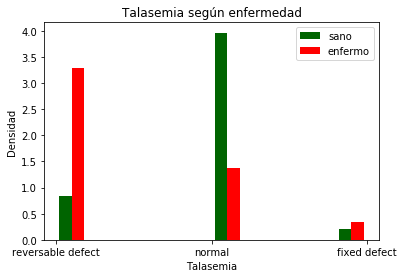

In [10]:
p_s = list(sanos['thal'])
p_e = list(enf['thal'])
col = ["darkgreen","red"]
lab = ["sano","enfermo"]
plt.hist([p_s,p_e],color=col,label=lab,density=True)
plt.xlabel("Talasemia")
plt.ylabel("Densidad")
plt.title("Talasemia según enfermedad")
plt.legend()
plt.show()

## One hot encoding

En este proceso, nuestras variables categóricas las binarizamos, según la cantidad de valores nominales que pueda obtener esta variable, este es importante ya que los modelos pueden interpretar ciertos valores categóricos más importantes que otros afectando el resultado de los modelos.
Al terminar nuestra binarización pasamos de 14 variables a 26

In [19]:
df = pd.get_dummies(df)
df.head()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal,sex_female,sex_male,chest_pain_asymptomatic,...,electro_left ventricular hypertrophy,electro_normal,angina_no,angina_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,70.0,130.0,322.0,109.0,2.4,3.0,2,0,1,1,...,1,0,1,0,0,1,0,0,1,0
1,67.0,115.0,564.0,160.0,1.6,0.0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2,57.0,124.0,261.0,141.0,0.3,0.0,2,0,1,0,...,0,1,1,0,0,0,1,0,0,1
3,64.0,128.0,263.0,105.0,0.2,1.0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
4,74.0,120.0,269.0,121.0,0.2,1.0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0


## Predicción de la presión sanguínea

Sabemos que una alta presión sanguínea es un buen indicador para estimar si el paciente posee una enfermedad, por ende intentaremos predecir la presión dada otras variables

### Preparación de los datos

Preparamos nuestro conjunto de datos para usar con el modelo de regresión lineal

In [20]:
# Obtenemos nuestra etiqueta
label = df.pop("normal").values - 1
presion = df.pop("blood_p").values
X_data = df.values

### Creación conjunto de pruebas

Para tener datos con los cuales probar nuestro modelo y entrenarlo debemos generar un conjunto con el trabajar

In [26]:
np.random.seed(0)
# Vector de seleccion 30%
mask_test = np.random.rand(X_data.shape[0]) < 0.30
# Selección de datos de entrenamiento y pruebas
X_train = X_data[~mask_test]
X_test = X_data[mask_test]
presion_train = presion[~mask_test]
presion_test = presion[mask_test]
label_train = label[~mask_test]
label_test = label[mask_test]
print("Entradas de entrenamiento:", X_train.shape[0])
print("Entradas de prueba:", X_test.shape[0])

Entradas de entrenamiento: 184
Entradas de prueba: 86


### Estandarización de los datos

Este paso es vital, ya que hace que nuestros datos sean consistentes y las comparaciones entre ellos sean relevantes

In [28]:
from sklearn.preprocessing import StandardScaler
# Estandarizador
std = StandardScaler()
std.fit(X_train)
# Datos estandarizados
Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)

### Regresión lineal

Procedemos a ejecutar una regresión de mínimos cuadrados, con la cual buscamos predecir la presión sanguínea

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(Xstd_train, presion_train)
pred_train = model.predict(Xstd_train)
pred_test = model.predict(Xstd_test)

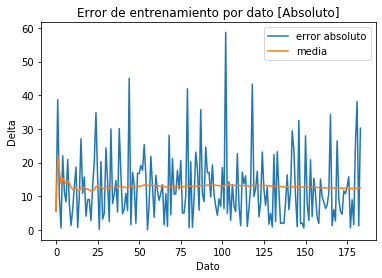

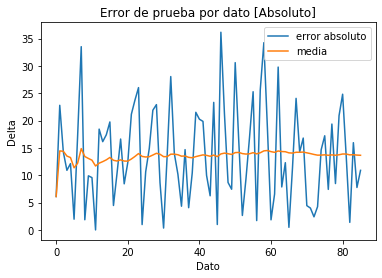

In [63]:
# Grafico entrenamiento
delta = pred_train - presion_train
delta = list(map(abs,delta))
i = 1
sum = 0
med = []
for a in delta:
    sum += a
    med.append(sum/i)
    i += 1
plt.plot(delta,label="error absoluto")
plt.plot(med,label="media")
plt.xlabel("Dato")
plt.ylabel("Delta")
plt.title("Error de entrenamiento por dato [Absoluto]")
plt.legend()
plt.show()
# Grafico prueba
delta = pred_test - presion_test
delta = list(map(abs,delta))
i = 1
sum = 0
med = []
for a in delta:
    sum += a
    med.append(sum/i)
    i += 1
plt.plot(delta,label="error absoluto")
plt.plot(med,label="media")
plt.xlabel("Dato")
plt.ylabel("Delta")
plt.title("Error de prueba por dato [Absoluto]")
plt.legend()
plt.show()

Con los graficos de error podemos notar que obtenemos un delta  en la medicion de la presión sanguínea cercano a las 15 unidades (en ambos conjuntos), la cual es cercana a la desviación estándar del conjunto completo

In [76]:
from sklearn.metrics import f1_score

f1_score(presion_test,list(map(int,pred_test)),average=None)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.2       , 0.        ,
       0.        , 0.28571429, 0.        , 0.13333333, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])